In [8]:
import os
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['axes.grid'] = True
plt.style.use('dark_background')

In [9]:
def two_body_eqm(_y, _t, _G, _m1, _m2):
    """
    differential equations of motion describing the two-body-problem
    _t: discrete time step value
    _y: state vector
    """
    # magnitude of position vector from r1 to r2
    r_mag = np.linalg.norm(_y[3:6] - _y[:3])
    c0 = _y[6:12] # dx1/dt = v1, dx2/dt = v2
    c1 = _G * _m2 * ((_y[3:6] - _y[:3]) / np.power(r_mag, 3)) # a1 = dv1/dt = F/m1
    c2 = _G * _m1 * ((_y[:3] - _y[3:6]) / np.power(r_mag, 3)) # a2 = dv2/dt = F/m2
    return np.concatenate((c0, c1, c2)) # [dx1/dt..., dx2/dt..., dv1/dt..., dv2/dt... ]


# ==============================================================
G = 6.67259e-20  # (km**3/kg/s**2)

# time array
time = np.arange(0, 480, 0.5)

# body m1 initial conditions
m1 = 1e26  # mass (kg)
r10 = np.array([0, 0, 0])  # initial position (km)
v10 = np.array([10, 20, 30])  # initial velocity (km/s)

# body m2 initial conditions
m2 = 1e26  # mass (kg)
r20 = np.array([3000, 0, 0])  # initial position (km)
v20 = np.array([0, 40, 0])  # initial velocity (km/s)

# [X1 (0), Y1 (1), Z1 (2), X2 (3), Y2 (4), Z2 (5), VX1 (6), VY1 (7), VZ1 (8), VX2 (9), VY2 (10), VZ2 (11)]
y0 = np.concatenate((r10, r20, v10, v20))

# ==============================================================
# propagate state

# simulation results
state_history = []

y = odeint(two_body_eqm, y0, time, args=(G, m1, m2))

In [10]:
print(y[0,3])

3000.0


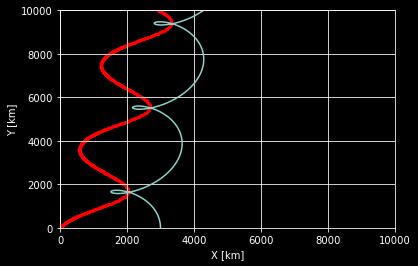

In [11]:
fig, ax = plt.subplots()

scat = ax.scatter(y[:,0], y[:,1], c="r", s=5)#, label=f'v0 = {v0} m/s')
line2 = ax.plot(y[:,3], y[:,4])[0]#, label=f'v0 = {v02} m/s')[0]

ax.set(xlim=[0, 10000], ylim=[0, 10000], xlabel='X [km]', ylabel='Y [km]')
#ax.legend()

plt.show()

In [12]:
def update(frame):
    # for each frame, update the data stored on each artist.
    global y
    x_ = y[:frame, 0]
    y_ = y[:frame, 1]
    # update the scatter plot:
    data = np.stack([x_, y_]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(y[:frame, 3])
    line2.set_ydata(y[:frame, 4])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=500, interval=10)


from IPython.display import HTML
HTML(ani.to_jshtml())
